# Code tests

There have been a significant amount of changes in the code base and some of the use paridigms have changed, so here we just test our code to make sure it's working.

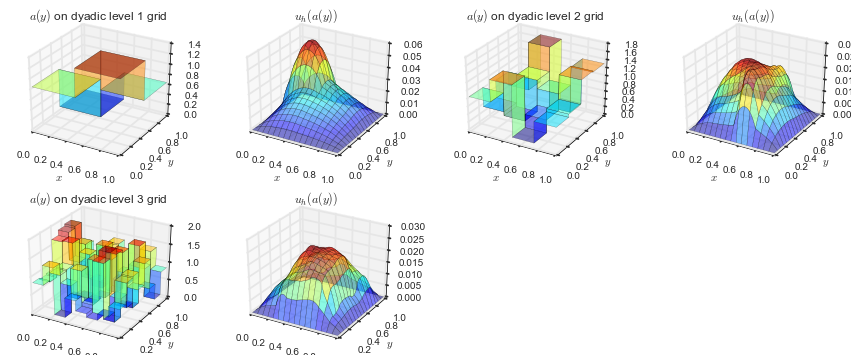

In [1]:
import numpy as np
import importlib
import dyadic_fem as df
import point_generator as pg
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
importlib.reload(df)
importlib.reload(pg)
%matplotlib inline

fem_div = 7

a_bar = 1.0
c = 0.9

np.random.seed(1)
y_4 = 2 * np.random.random(2**1 * 2**1) - 1
a_4 = df.DyadicPWConstant(a_bar + c * y_4.reshape([2**1, 2**1]), div=1)
fem_4 = df.DyadicFEMSolver(div=fem_div, rand_field=a_4, f=1.0)
fem_4.solve()

np.random.seed(1)
y_16 = 2 * np.random.random(2**2 * 2**2) - 1
a_16 = df.DyadicPWConstant(a_bar + c * y_16.reshape([2**2, 2**2]), div=2)
fem_16 = df.DyadicFEMSolver(div=fem_div, rand_field=a_16, f=1.0)
fem_16.solve()

np.random.seed(1)
y_64 = 2 * np.random.random(2**3 * 2**3) - 1
a_64 = df.DyadicPWConstant(a_bar + c * y_64.reshape([2**3, 2**3]), div=3)
fem_64 = df.DyadicFEMSolver(div=fem_div, rand_field=a_64, f=1.0)
fem_64.solve()

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(2, 4, 1, projection='3d')
a_4.plot(ax, title='$a(y)$ on dyadic level 1 grid')
ax = fig.add_subplot(2, 4, 2, projection='3d')
fem_4.u.plot(ax, title='$u_h(a(y))$')
ax = fig.add_subplot(2, 4, 3, projection='3d')
a_16.plot(ax, title='$a(y)$ on dyadic level 2 grid')
ax = fig.add_subplot(2, 4, 4, projection='3d')
fem_16.u.plot(ax, title='$u_h(a(y))$')
ax = fig.add_subplot(2, 4, 5, projection='3d')
a_64.plot(ax, title='$a(y)$ on dyadic level 3 grid')
ax = fig.add_subplot(2, 4, 6, projection='3d')
fem_64.u.plot(ax, title='$u_h(a(y))$')
plt.show()

[]

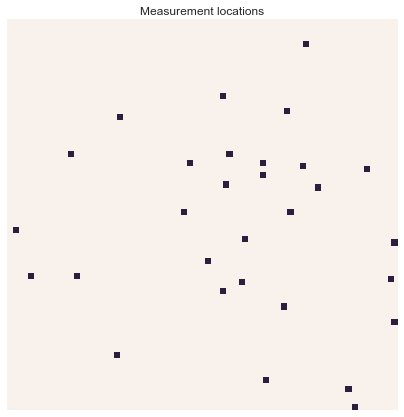

In [2]:
# local_width is the width of the measurement squares
local_width = 2**(fem_div - 6)

m = 30

# We make the ambient spaces for Wm and Vn
np.random.seed(2)

# we make a bounding box to be the quarter square
side_n = 2**fem_div-1
bounding_box = np.array([[0, 2**(fem_div-1)], [0, 2**(fem_div-1)]])

Wm, Wloc = df.make_random_local_integration_basis(m=m, div=fem_div, width=local_width, space='H1', return_map=True)
Wm = Wm.orthonormalise()

fig, ax = plt.subplots(figsize=(7,7))     
sns.heatmap(Wloc.values, xticklabels=False, yticklabels=False, cbar=False, ax=ax)
ax.set_title('Measurement locations')
plt.plot()

In [3]:
field_div = 2

point_gen = pg.MonteCarlo(d=2**field_div*2**field_div, n=200, lims=[-1, 1], seed=3)
point_gen_scaled = pg.MonteCarlo(d=2**field_div*2**field_div, n=200, lims=[a_bar-c, a_bar+c], seed=3)
#point_gen = pg.QMCLatticeRule(d=2**field_div*2**field_div, n=5000, lims=[-1, 1])

grb_cons = df.GreedyBasisConstructor(n=m, fem_div=fem_div, point_gen=point_gen_scaled, verbose=True)
Vn_grb_class = grb_cons.construct_basis()
Vn_grb = df.greedy_reduced_basis_construction(n=m, field_div=field_div, fem_div=fem_div, \
                                              point_gen=point_gen, a_bar=a_bar, c=c, verbose=True)

Vn_mrb = df.measurement_based_greedy_reduced_basis_construction(n=m, field_div=field_div, fem_div=fem_div, \
                                                    point_gen=point_gen, Wm=Wm, a_bar=a_bar, c=c, verbose=True)
mrb_cons = df.MBGreedyBasisConstructor(n=m, fem_div=fem_div, Wm=Wm, point_gen=point_gen_scaled, verbose=True)
Vn_mrb_class = mrb_cons.construct_basis()

Vn_sin = df.make_sin_basis(fem_div, N=2**(fem_div-2), space='H1')
Vn_red, Vn_red_fields = df.make_reduced_basis(n=m, field_div=field_div, fem_div=fem_div, space='H1', a_bar=a_bar, c=c)



Generating basis from greedy algorithm with dictionary: 
i 	 || phi_i || 		 || phi_i - P_V_(i-1) phi_i ||
1 : 	 0.008697927637844832 	 6.296197397929589e-05
2 : 	 0.008572129927458937 	 4.1084983557385725e-05
3 : 	 0.007861249035572568 	 3.755163167741831e-05
4 : 	 0.008542218149627018 	 3.1602815952013455e-05
5 : 	 0.0073220268293958885 	 2.5349441407196358e-05
6 : 	 0.006503586625964654 	 2.2015840433244518e-05
7 : 	 0.0073718411469543745 	 1.9382185456548954e-05
8 : 	 0.008297284876529653 	 1.6802198153165093e-05
9 : 	 0.007242787844661514 	 1.6387007623157365e-05
10 : 	 0.0052810929440463795 	 1.3490681352124468e-05
11 : 	 0.007534543611572979 	 1.1873818657089079e-05
12 : 	 0.005651017391617194 	 1.1744359164981933e-05
13 : 	 0.005377097389919219 	 1.0313576736158513e-05
14 : 	 0.008560152026998334 	 8.6600301885167e-06
15 : 	 0.00540007224845822 	 7.269159226515234e-06
16 : 	 0.006706750175877255 	 6.546054389350874e-06
17 : 	 0.004471427638914796 	 5.725981998828689e-06
18 : 	

In [4]:
w = Wm.dot(fem_16.u)
u_p_w = Wm.project(fem_16.u)

ns = range(2, m+1, 2)

bases = [Vn_sin, Vn_red, Vn_grb, Vn_grb_class, Vn_mrb, Vn_mrb_class]
basis_labels = ['Sinusoid basis', 'Reduced basis', 'Greedy algo', 'Greedy algo abstract class', \
                'meas-based greedy algo', 'meas-based greedy algo abstract class' ]

stats = np.zeros([6, len(bases), len(ns)])

for i, n in enumerate(ns):

    for j, Vn_big in enumerate(bases):
    
        Vn = Vn_big.subspace(slice(0,n))

        u_p_v = Vn.project(fem_16.u)
        BP = df.BasisPair(Wm, Vn)
        FB = BP.make_favorable_basis()
        u_star, v_star, w_p, v_w_p = FB.measure_and_reconstruct(fem_16.u)

        stats[0, j, i] = (fem_16.u-u_star).norm(space='H1')
        stats[1, j, i] = (u_star - v_star).norm(space='H1')
        stats[2, j, i] = FB.beta()
        stats[3, j, i] = np.linalg.cond(BP.G.T @ BP.G)
        stats[4, j, i] = (fem_16.u - u_p_v).norm(space='H1')

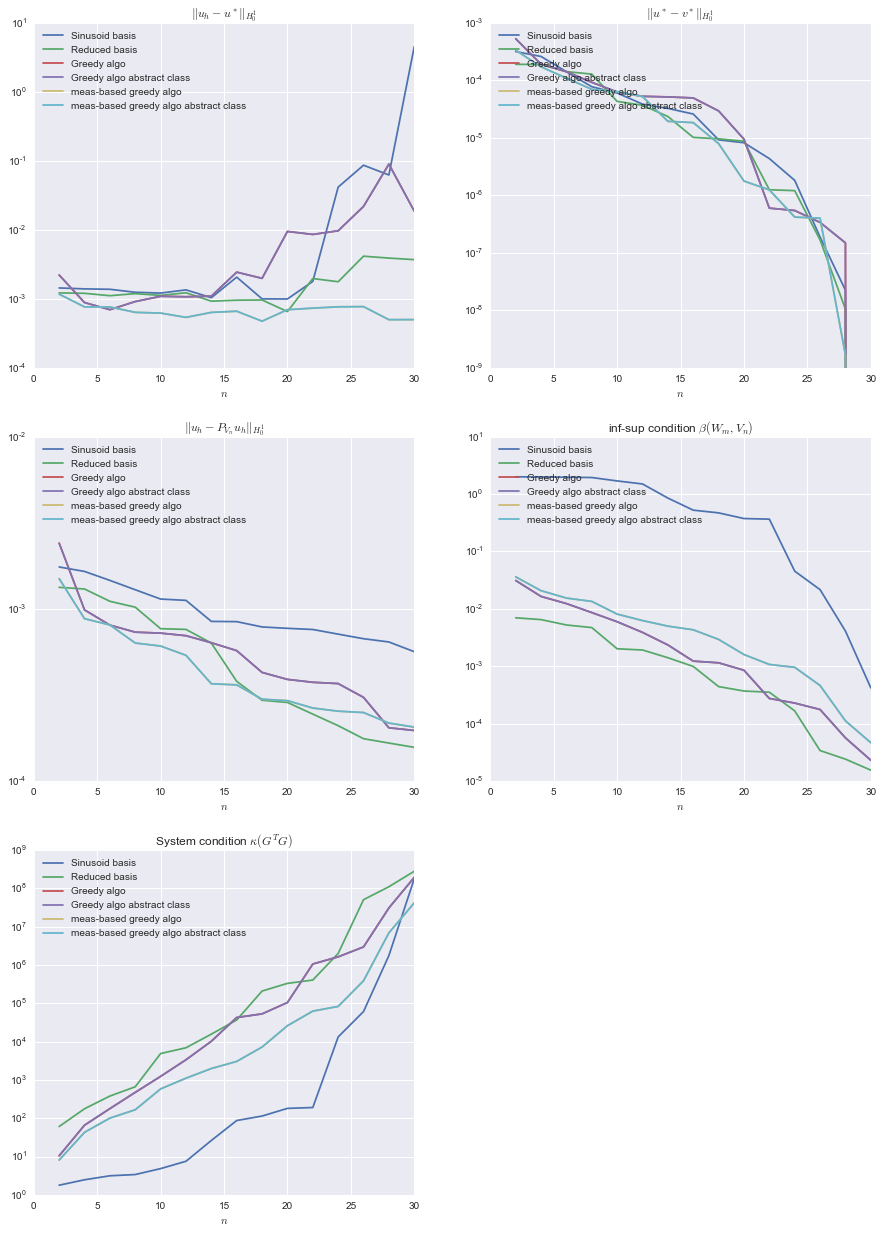

In [5]:
axs = []
fig = plt.figure(figsize=(15, 21))
axs.append(fig.add_subplot(3, 2, 1, title='$\| u_h - u^* \|_{H_0^1}$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(3, 2, 2, title='$\| u^* - v^* \|_{H_0^1}$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(3, 2, 3, title='$\| u_h - P_{V_n} u_h \|_{H_0^1}$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(3, 2, 4, title=r'inf-sup condition $\beta(W_m, V_n)$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(3, 2, 5, title=r'System condition $\kappa(G^T G)$'))
axs[-1].set(yscale="log", xlabel='$n$')

for j, basis_label in enumerate(basis_labels):

    axs[0].plot(ns, stats[0, j, :], label=basis_label)
    axs[0].legend(loc=2)
    axs[1].plot(ns, stats[1, j, :], label=basis_label)
    axs[1].legend(loc=2)
    axs[2].plot(ns, stats[4, j, :], label=basis_label)
    axs[2].legend(loc=2)
    axs[3].plot(ns, stats[2, j, :], label=basis_label)
    axs[3].legend(loc=2)
    axs[4].plot(ns, stats[3, j, :], label=basis_label)
    axs[4].legend(loc=2)

    
plt.show()